# I. Visualisation

**0. Installing Dependencies**

In [70]:
#Dependencies
%pip install openpyxl matplotlib pandas darts statsmodels -q

Note: you may need to restart the kernel to use updated packages.


In [71]:
file_paths = [
    '../../Data/EnergieUebersichtCH-2021.xlsx',
    '../../Data/EnergieUebersichtCH-2022.xlsx',
    '../../Data/EnergieUebersichtCH-2023.xlsx',
    '../../Data/EnergieUebersichtCH-2024.xlsx',
    '../../Data/EnergieUebersichtCH-2025.xlsx'
]
sheet_name = 'Zeitreihen0h15'
total = 29000

**1. Retrieving Data**

In [72]:
import pandas as pd
# Read and concatenate all data
dfs = []
for path in file_paths:
    xls = pd.ExcelFile(path)
    df_year = pd.read_excel(xls, sheet_name=sheet_name, header=1)
    dfs.append(df_year)


Combining all years into a single DataFrame

In [73]:
df = pd.concat(dfs, ignore_index=True)
print(df.columns)

Index(['Zeitstempel', 'kWh', 'kWh.1', 'kWh.2', 'kWh.3', 'kWh.4', 'kWh.5',
       'kWh.6', 'kWh.7', 'kWh.8', 'kWh.9', 'kWh.10', 'kWh.11', 'kWh.12',
       'kWh.13', 'kWh.14', 'kWh.15', 'kWh.16', 'kWh.17', 'kWh.18', 'kWh.19',
       'Euro/MWh', 'Euro/MWh.1', 'Euro/MWh.2', 'Euro/MWh.3', 'kWh.20',
       'kWh.21', 'kWh.22', 'kWh.23', 'kWh.24', 'kWh.25', 'kWh.26', 'kWh.27',
       'kWh.28', 'kWh.29', 'kWh.30', 'kWh.31', 'kWh.32', 'kWh.33', 'kWh.34',
       'kWh.35', 'kWh.36', 'kWh.37', 'kWh.38', 'kWh.39', 'kWh.40', 'kWh.41',
       'kWh.42', 'kWh.43', 'kWh.44', 'kWh.45', 'kWh.46', 'kWh.47', 'kWh.48',
       'kWh.49', 'kWh.50', 'kWh.51', 'kWh.52', 'kWh.53', 'kWh.54', 'kWh.55',
       'kWh.56', 'kWh.57', 'kWh.58', 'kWh.59'],
      dtype='object')


1.1 Aggregate Data by day

In [74]:
df['Zeitstempel'] = pd.to_datetime(
    df['Zeitstempel'],
    format='%d.%m.%Y %H:%M',   
    dayfirst=True,            
    errors='raise'            
)


In [75]:
df = df.set_index('Zeitstempel')
df = df.resample('7D').sum()

In [76]:
df = df.iloc[:-1]

Recalculate total by 24h

In [77]:
total = int ((total / 96) -1) 
print(total)

301


In [78]:
time_index = df.index

**2. Data variables / potential parameters** 

**Pre-processing step** Renaming column names to be clear

In [79]:
column_mapping = { 
    'kWh': 'Total Energy Consumed by End Users (kWh)',
    'kWh.1': 'Total Energy Production (kWh)',
    'kWh.2': 'Total Energy Consumption (kWh)',
    'kWh.3': 'Net Outflow (kWh)',
    'kWh.4': 'Grid Feed-In (kWh)',
    'kWh.5': 'Positive Secondary Control Energy (kWh)',
    'kWh.6': 'Negative Secondary Control Energy (kWh)',
    'kWh.7': 'Positive Tertiary Control Energy (kWh)',
    'kWh.8': 'Negative Tertiary Control Energy (kWh)'
}

df.rename(columns=column_mapping, inplace=True)

The goal is to predict the next element of the Total Energy Consumption columb:

In [80]:
energy_consumption_data = df['Total Energy Consumption (kWh)'].dropna().values

In [81]:
import matplotlib.pyplot as plt

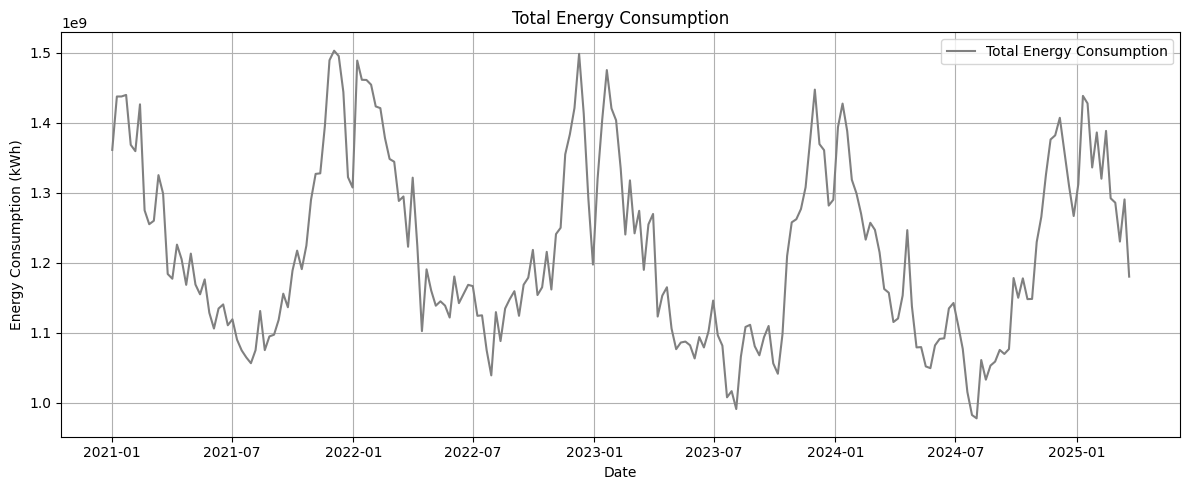

In [82]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(df['Total Energy Consumption (kWh)'], label='Total Energy Consumption', color='gray')
ax.set_title('Total Energy Consumption')
ax.set_xlabel('Date')
ax.set_ylabel('Energy Consumption (kWh)')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

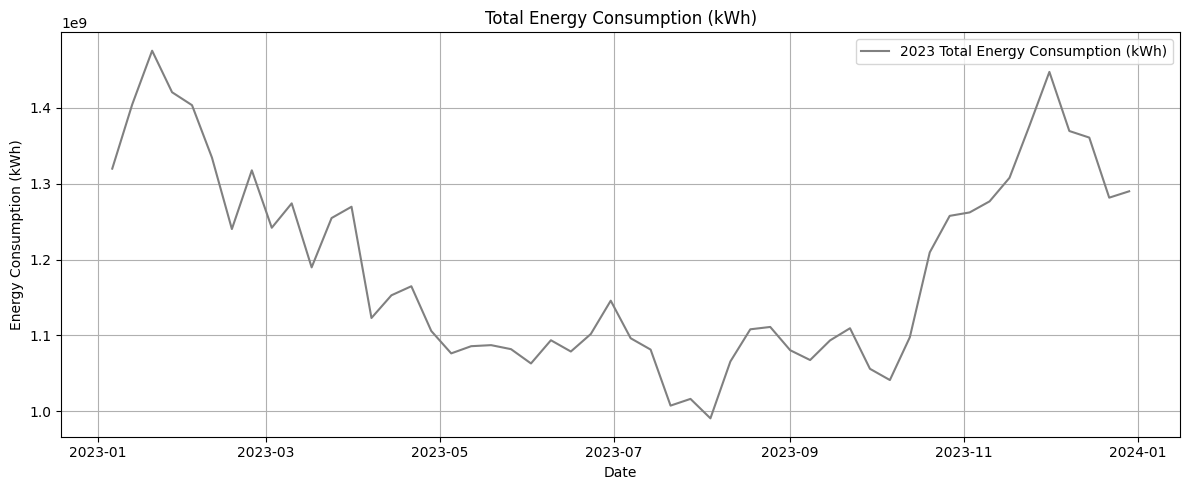

In [83]:
year = 2023
month = 11
df_summed = df
df_month = df_summed[(df_summed.index.year == year)]

# Plot
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(df_month['Total Energy Consumption (kWh)'], label=f'{year} Total Energy Consumption (kWh)', color='gray')
ax.set_title(f'Total Energy Consumption (kWh)')
ax.set_xlabel('Date')
ax.set_ylabel('Energy Consumption (kWh)')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

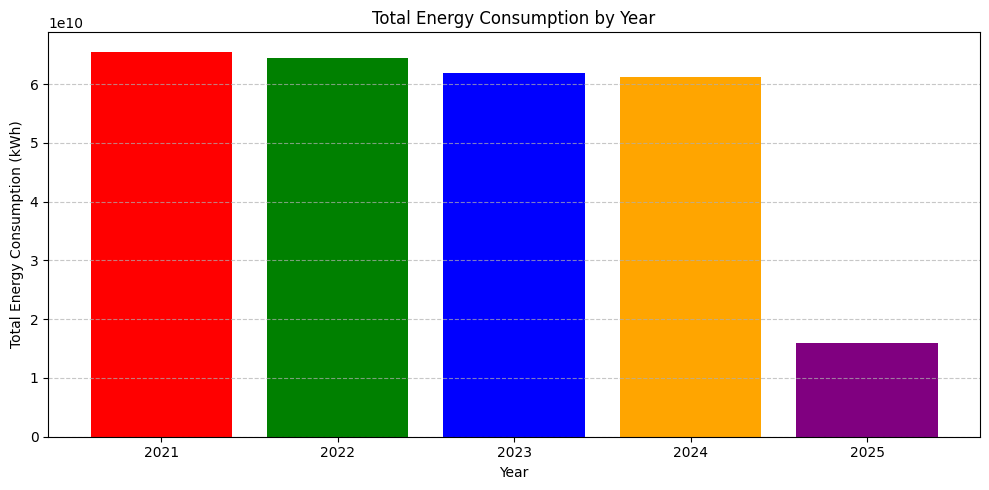

In [84]:
# Chart: Total Energy Consumption by Year (Aggregated with different bar colors)
import matplotlib.pyplot as plt

yearly_consumption = df['Total Energy Consumption (kWh)'].resample('Y').sum()

colors = ['red', 'green', 'blue', 'orange', 'purple', 'cyan']

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(yearly_consumption.index.year, yearly_consumption.values, color=colors[:len(yearly_consumption)])

ax.set_title('Total Energy Consumption by Year')
ax.set_xlabel('Year')
ax.set_ylabel('Total Energy Consumption (kWh)')
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


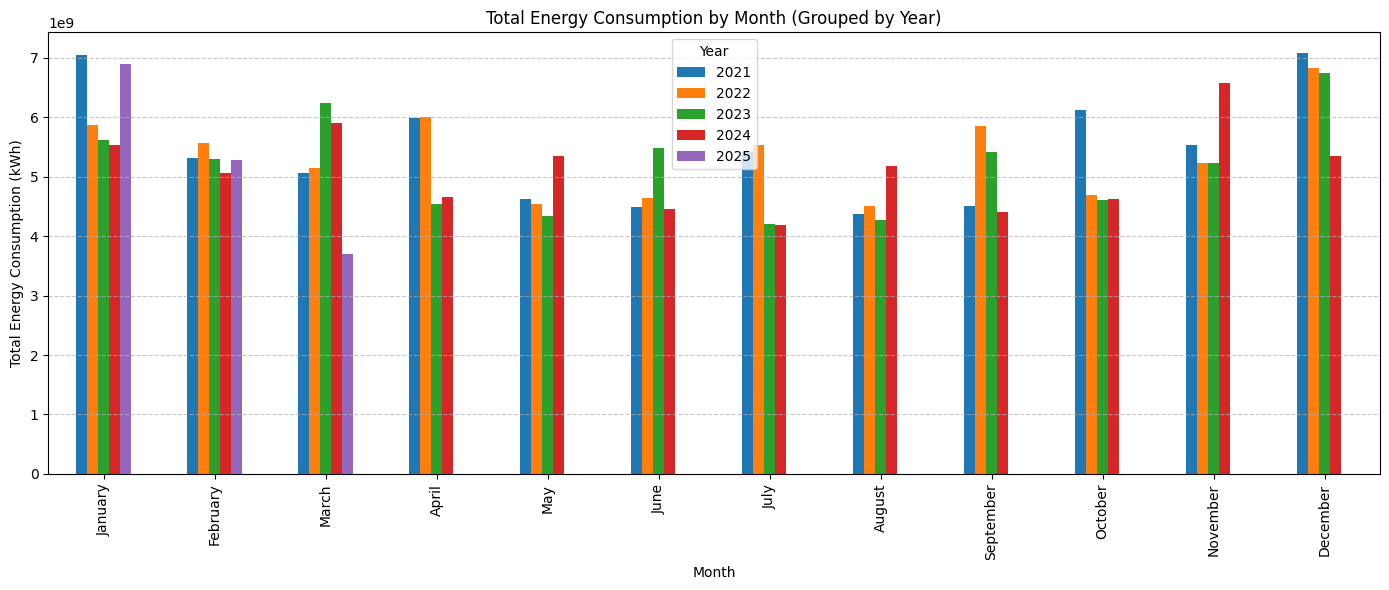

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

monthly_consumption = df['Total Energy Consumption (kWh)'].resample('M').sum()

monthly_df = monthly_consumption.to_frame()
monthly_df['Year'] = monthly_df.index.year
monthly_df['Month'] = monthly_df.index.month_name()

pivot = monthly_df.pivot_table(
    index='Month',
    columns='Year',
    values='Total Energy Consumption (kWh)',
    aggfunc='sum'
)

month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
pivot = pivot.reindex(month_order)

# Plot grouped bar chart
pivot.plot(kind='bar', figsize=(14, 6), color=plt.cm.tab10.colors[:len(pivot.columns)])

plt.title('Total Energy Consumption by Month (Grouped by Year)')
plt.xlabel('Month')
plt.ylabel('Total Energy Consumption (kWh)')
plt.legend(title='Year')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


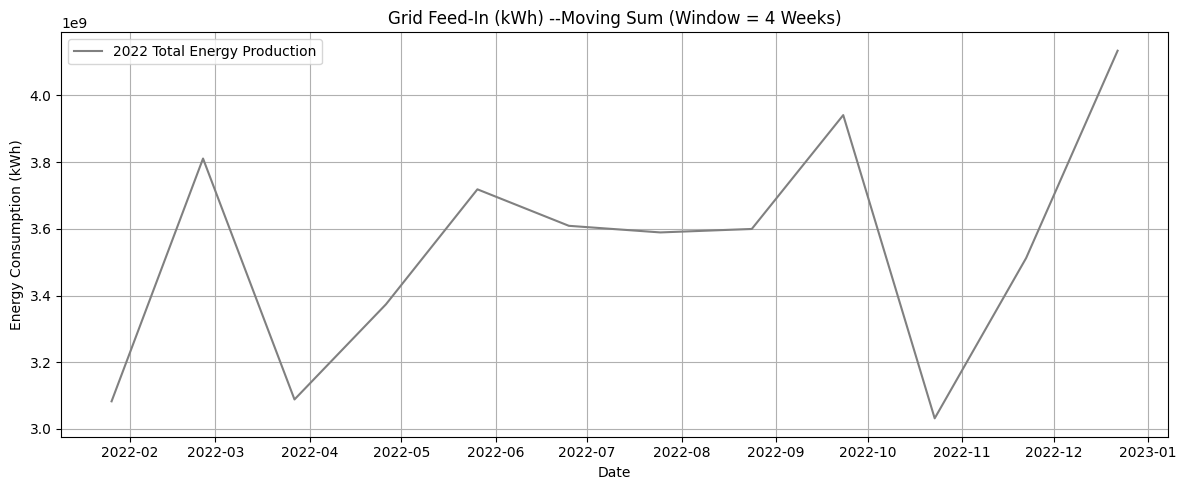

In [ ]:
year = 2021
month = 5
df_summed = df.resample('30D').sum()
df_month = df_summed[(df_summed.index.year == year)]

# Plot
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(df_month['Grid Feed-In (kWh)'], label=f'{year} Total Energy Production', color='gray')
ax.set_title(f'Grid Feed-In (kWh) --Moving Sum (Window = 4 Weeks)')
ax.set_xlabel('Date')
ax.set_ylabel('Energy Consumption (kWh)')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

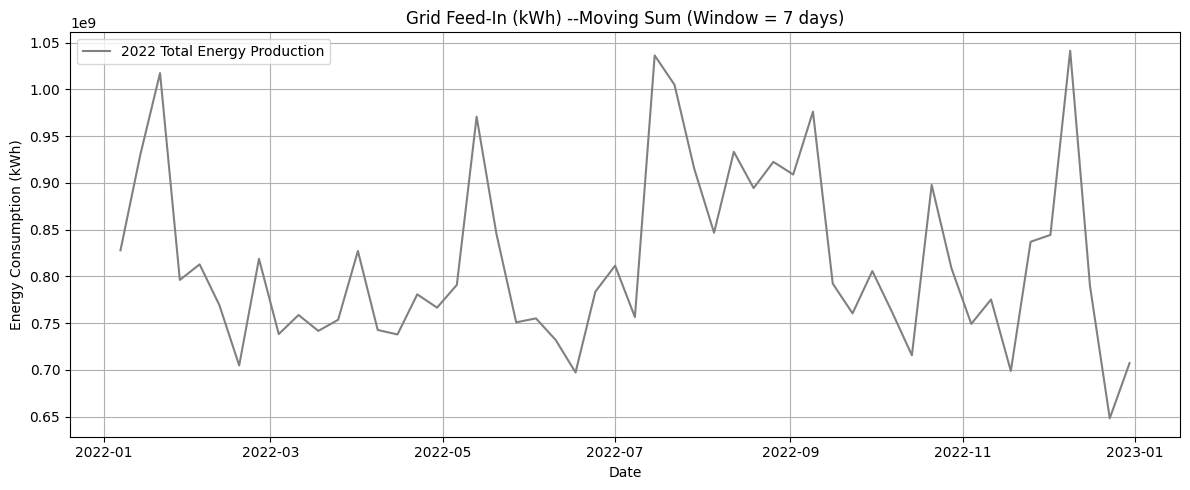

In [ ]:
year = 2021
month = 5
df_summed = df.resample('7D').sum()
df_month = df_summed[(df_summed.index.year == year)]

# Plot
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(df_month['Grid Feed-In (kWh)'], label=f'{year} Total Energy Production', color='gray')
ax.set_title(f'Grid Feed-In (kWh) --Moving Sum (Window = 7 days)')
ax.set_xlabel('Date')
ax.set_ylabel('Energy Consumption (kWh)')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

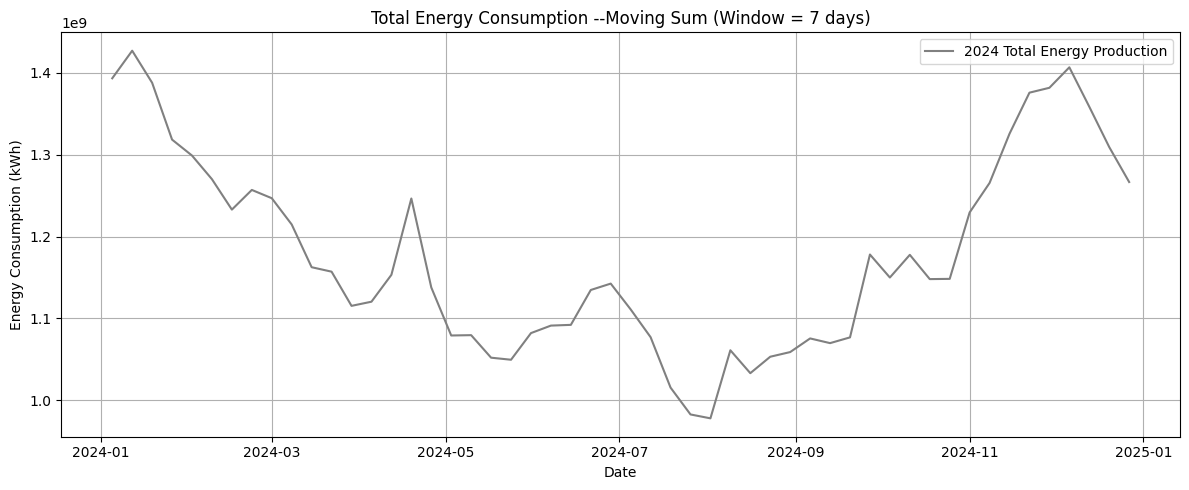

In [88]:
year = 2024
month = 5
df_summed = df.resample('7D').sum()
df_month = df_summed[(df_summed.index.year == year)]

# Plot
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(df_month['Total Energy Consumption (kWh)'], label=f'{year} Total Energy Production', color='gray')
ax.set_title(f'Total Energy Consumption --Moving Sum (Window = 7 days)')
ax.set_xlabel('Date')
ax.set_ylabel('Energy Consumption (kWh)')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

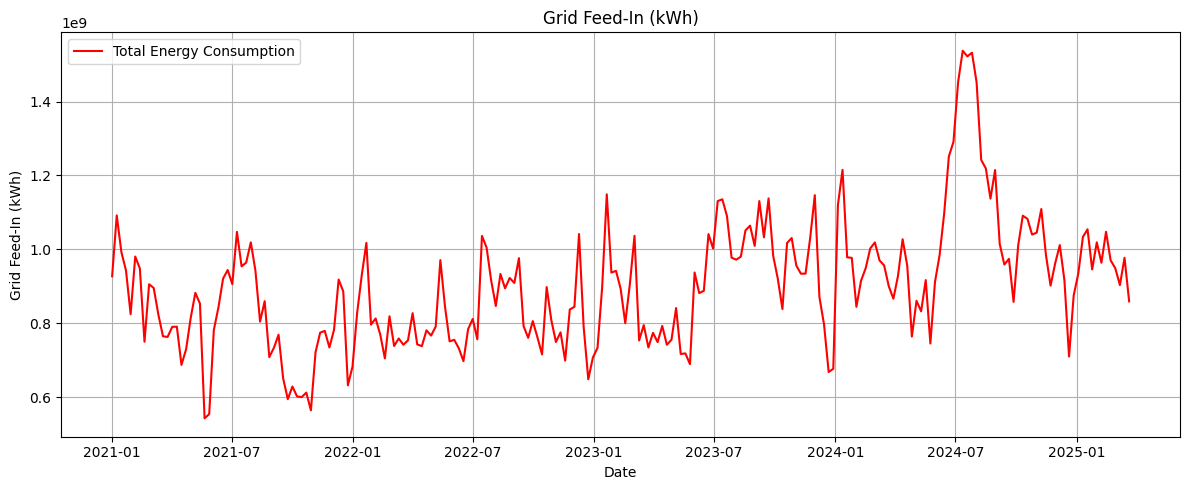

In [89]:
fig, ax = plt.subplots(figsize=(12, 5))
df = df.resample('7D').sum()
ax.plot(df['Grid Feed-In (kWh)'], label='Total Energy Consumption', color='red')
ax.set_title('Grid Feed-In (kWh)')
ax.set_xlabel('Date')
ax.set_ylabel('Grid Feed-In (kWh)')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

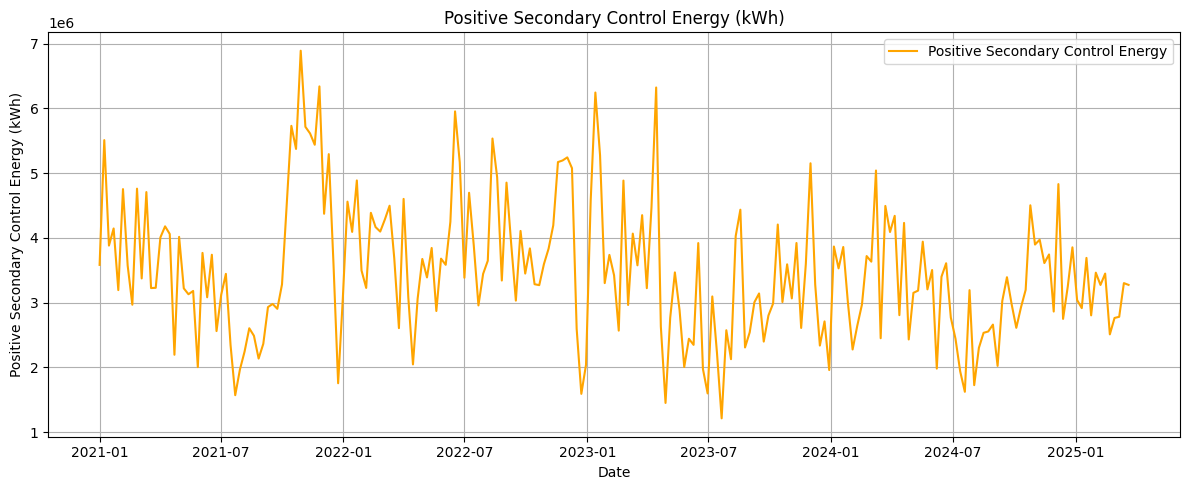

In [90]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(df['Positive Secondary Control Energy (kWh)'], label='Positive Secondary Control Energy', color='orange')
ax.set_title('Positive Secondary Control Energy (kWh)')
ax.set_xlabel('Date')
ax.set_ylabel('Positive Secondary Control Energy (kWh)')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

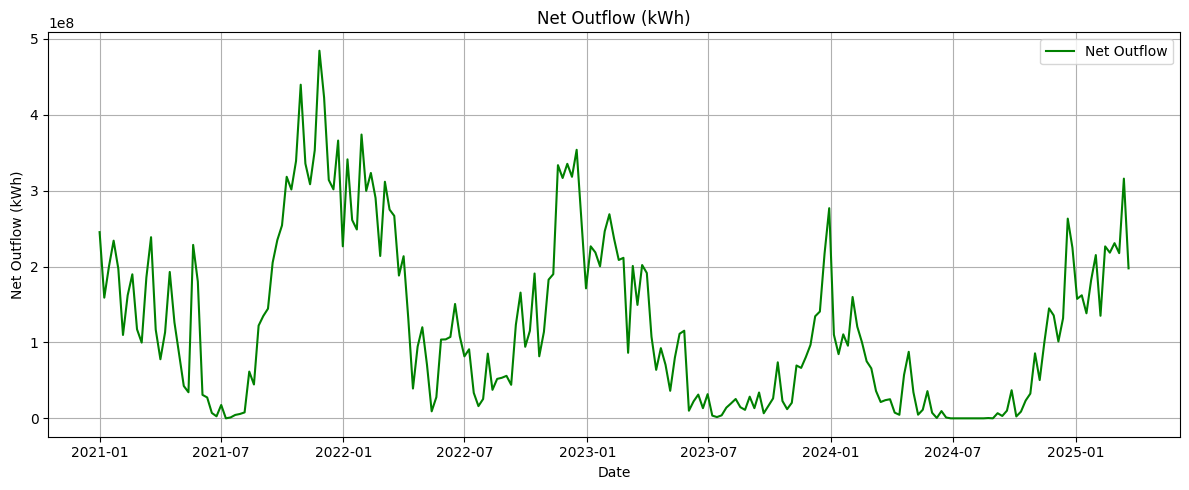

In [91]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(df['Net Outflow (kWh)'], label='Net Outflow', color='green')
ax.set_title('Net Outflow (kWh)')
ax.set_xlabel('Date')
ax.set_ylabel('Net Outflow (kWh)')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

In [92]:
years = [2022, 2023, 2024]

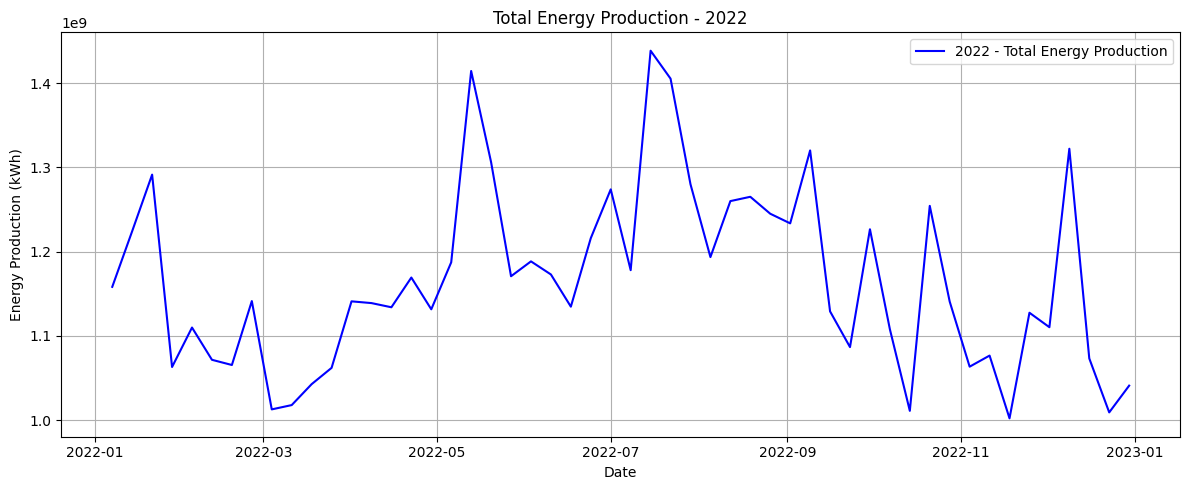

In [ ]:
year = 2021
df_year = df[df.index.year == year]
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(df_year['Total Energy Production (kWh)'], label=f'{year} - Total Energy Production', color='blue')
ax.set_title(f'Total Energy Production - {year}')
ax.set_xlabel('Date')
ax.set_ylabel('Energy Production (kWh)')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()


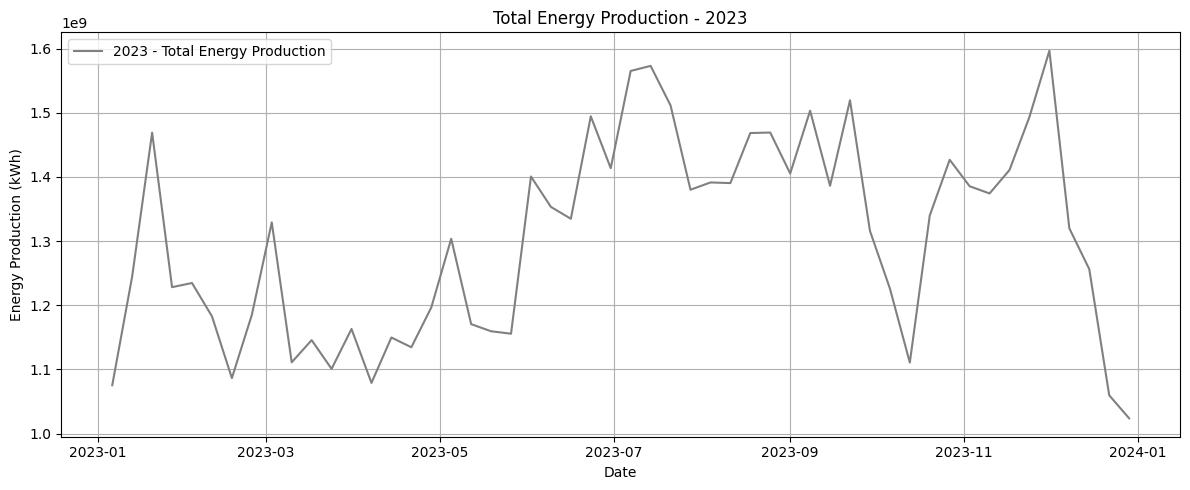

In [ ]:
year = 2021
df_year = df[df.index.year == year]
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(df_year['Total Energy Production (kWh)'], label=f'{year} - Total Energy Production', color='gray')
ax.set_title(f'Total Energy Production - {year}')
ax.set_xlabel('Date')
ax.set_ylabel('Energy Production (kWh)')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()


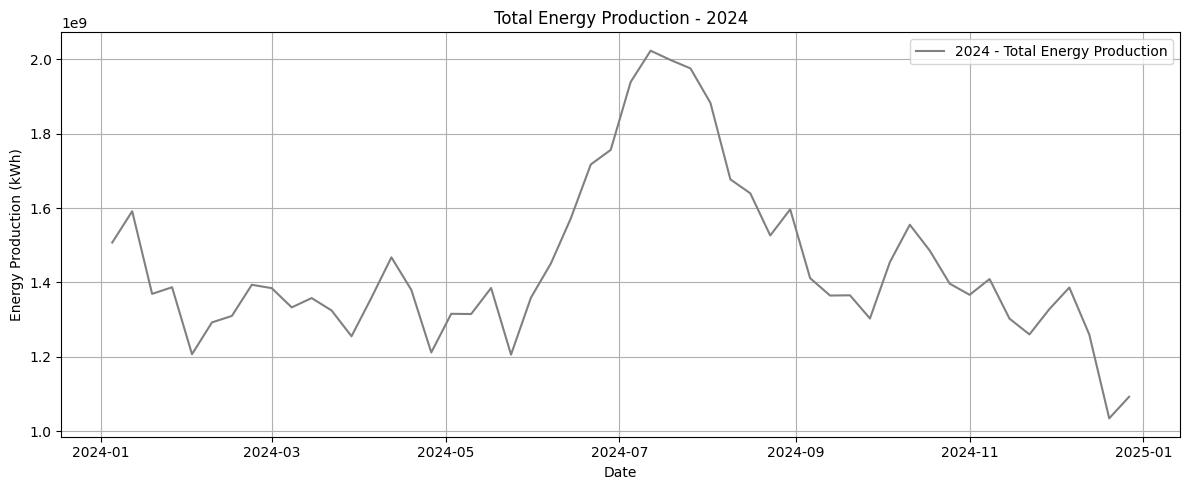

In [95]:
year = 2024
df_year = df[df.index.year == year]
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(df_year['Total Energy Production (kWh)'], label=f'{year} - Total Energy Production', color='gray')
ax.set_title(f'Total Energy Production - {year}')
ax.set_xlabel('Date')
ax.set_ylabel('Energy Production (kWh)')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()


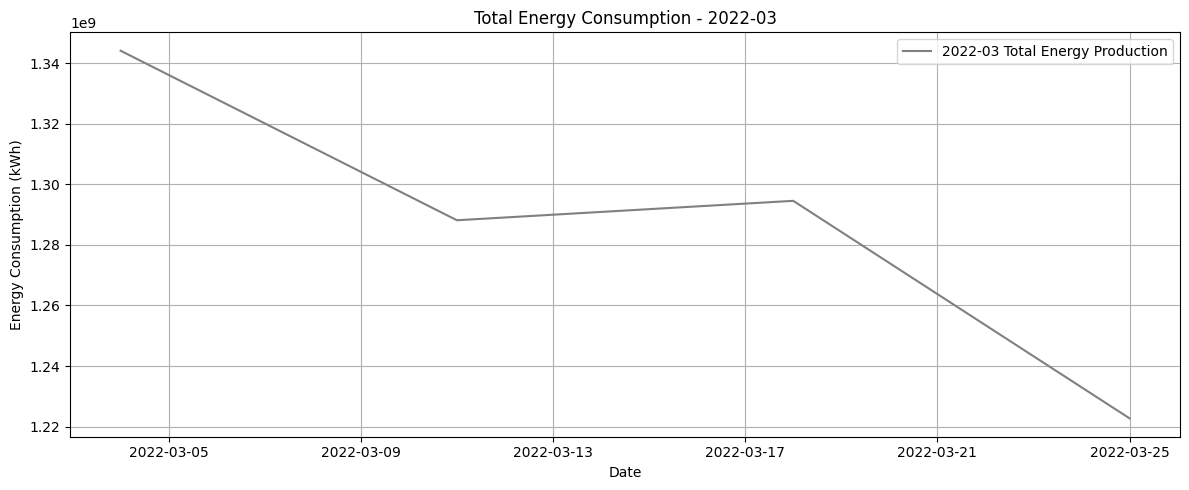

In [ ]:
year = 2021
month = 3
df_month = df[(df.index.year == year) & (df.index.month == month)]
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(df_month['Total Energy Consumption (kWh)'], label=f'{year}-{month:02d} Total Energy Production', color='gray')
ax.set_title(f'Total Energy Consumption - {year}-{month:02d}')
ax.set_xlabel('Date')
ax.set_ylabel('Energy Consumption (kWh)')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()


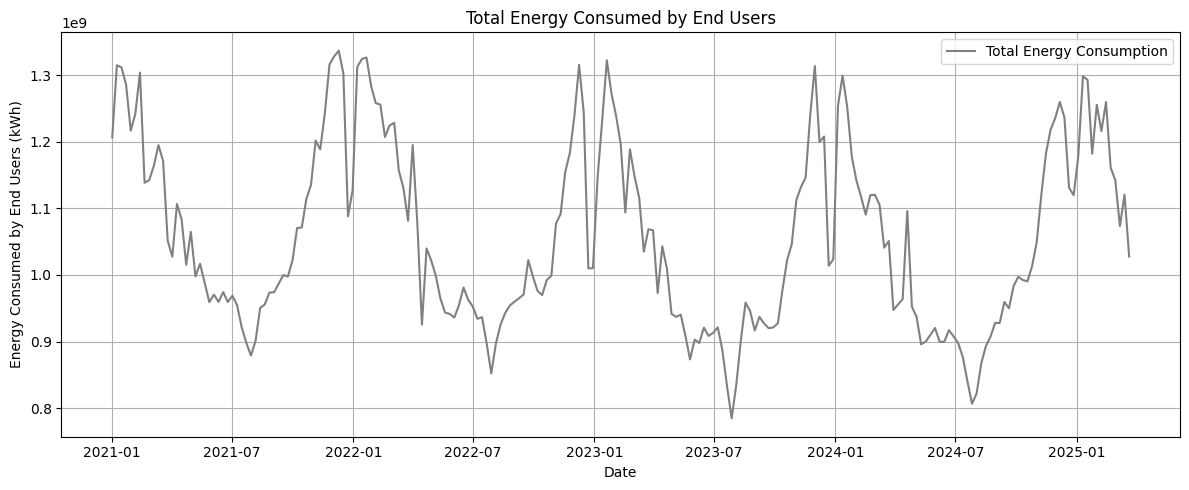

In [97]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(df['Total Energy Consumed by End Users (kWh)'], label='Total Energy Consumption', color='gray')
ax.set_title('Total Energy Consumed by End Users')
ax.set_xlabel('Date')
ax.set_ylabel('Energy Consumed by End Users (kWh)')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

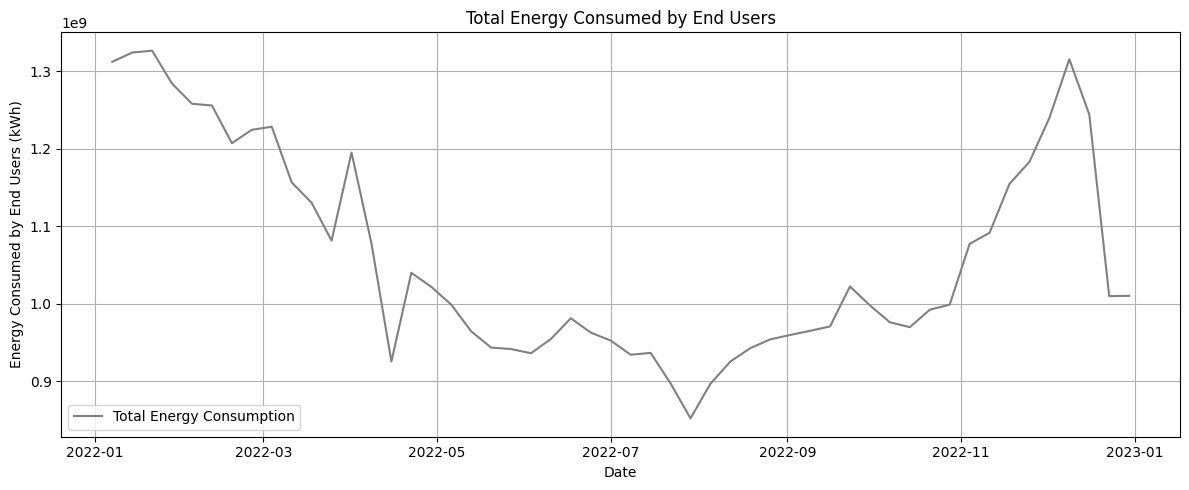

In [98]:

df_year = df[df.index.year == 2022]
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(df_year['Total Energy Consumed by End Users (kWh)'], label='Total Energy Consumption', color='gray')
ax.set_title('Total Energy Consumed by End Users')
ax.set_xlabel('Date')
ax.set_ylabel('Energy Consumed by End Users (kWh)')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()


# Visualising Weather 

In [99]:
%pip install xarray cfgrib eccodes -q

Note: you may need to restart the kernel to use updated packages.


In [100]:
import matplotlib.pyplot as plt
import pandas as pd
import cdsapi

/opt/homebrew/lib/python3.11/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


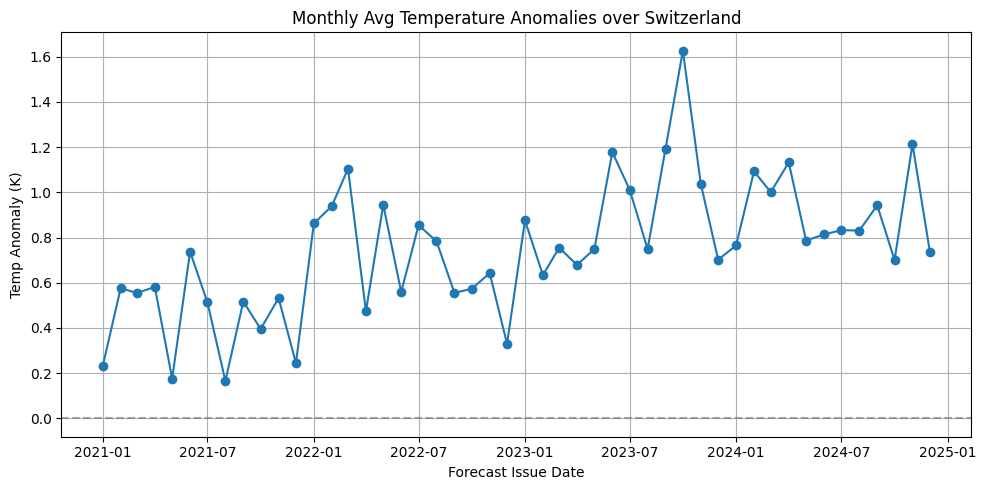

In [101]:

c = cdsapi.Client()
lat_min = 45.8
lat_max = 48.5
lon_min = 5.9
lon_max = 10.5
import xarray as xr

# Open GRIB file using cfgrib engine
ds = xr.open_dataset("../../Data/Weather/Seasonal forecast anomalies on single levels.grib", engine="cfgrib")

# Subset to Switzerland only
swiss = ds['t2a'].sel(
    latitude=slice(lat_max, lat_min),  # North to South
    longitude=slice(lon_min, lon_max)  # West to East
)

# Average over space (lat/lon) and ensemble members
monthly_avg = swiss.mean(dim=['latitude', 'longitude', 'number'])

# Loop over time dimension to print monthly forecast issue dates
for i in range(monthly_avg.time.size):
    issue_month = str(monthly_avg.time.values[i])[:10]  # e.g., '2021-01-01'
    
    # Mean over all lead times (or choose step=0 if you want only 1 month ahead)
    mean_forecast = monthly_avg.isel(time=i).mean(dim='step').values


# Average over space (lat/lon) and ensemble members
monthly_avg = swiss.mean(dim=['latitude', 'longitude', 'number'])

# Mean over steps (lead time) — gives monthly anomaly per issue date
monthly_mean_anomaly = monthly_avg.mean(dim='step')  # shape: (time,)

# Convert to pandas for easy plotting
dates = pd.to_datetime(monthly_mean_anomaly.time.values)
anomaly_values = monthly_mean_anomaly.values

# Plot
plt.figure(figsize=(10, 5))
plt.plot(dates, anomaly_values, marker='o')
plt.title("Monthly Avg Temperature Anomalies over Switzerland")
plt.xlabel("Forecast Issue Date")
plt.ylabel("Temp Anomaly (K)")
plt.grid(True)
plt.axhline(0, color='gray', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
